Please fill in your name and that of your teammate.

You: Amine CHARFEDDINE

Teammate: Delil DAG

# Introduction

Welcome to the ninth lab. Time to start with the famed neural networks. Everything should be fine until you hit the backpropagation algorithm. There are dozens of versions and implementations online, none are simple or straightforward, but in the lecture I tried an explanation that keeps the complexity to a minimum. It may be confusing to find which part does what and how to implement it, so I added a few tips that I hope will limit your debugging time. Enjoy!

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 14 points (out of 21 available) to pass** (66%).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

# 1. Fundamentals

#### 1.1 **[1pt]** Describe a real (human) neuron. Use the words "dendrite", "axon", "synapses" and "spike".

A human neuron receives signals through dendrites, transmits them along the axon, and communicates with other neurons at synapses. When an electrical impulses, known as action potentials or spikes, reach the synapse, neurotransmitters are released. This facilitates the signal transmission to neighboring neurons.

#### 1.2 **[1pt]** Describe the logistic function (in English). Include/utilize the concept of "saturation".

The logistic function is like an elongate S shaped curve. It maps inputs to outputs between 0 and 1. "Saturation" describes how the function behaves. It's when inputs are very small or very large : in these cases, the output becomes respectively close to 0 and 1. Outputs between 0 and 1 are desirable in neural networks because they can be interpreted as probabilities, making classification tasks easier. 

#### 1.3 **[1pt]** Explain the relationship between the human brain, neural networks, and perceptrons (in English).

The human brain inspires how we design artificial neural networks, which are computer systems that learn and solve problems like the brain does. In fact, they mimic the interconnected structure of the brain and the mechanism of signal processing. Within these networks, perceptrons act like simplified versions of brain cells. They help process information and make decisions. Indeed, the perceptrons process inputs and produce outputs, which has several useful applicaitons like pattern recognition.

#### 1.4 **[2pt]** Write the full equation for a network with structure [2, 4, 1], specifying the value of the final activation `act`. How many weights does this network have?

- This means two inputs, one hidden layer of four neurons, and one neuron in the output layer.
- You can provide either the linear algebra equation (still, define any vector or matrix you use) or the fully-expanded version (as `act` in the slides).
- Feel free to ignore the bias connection for now.
- To define multiple equations on individual lines: use the double dollar sign environment, then `\\` to go to a new line (see source of this cell: `$$ eq_1=0 \\ eq_2=1 $$` => $$ eq_1=0 \\ eq_2=1 $$
- To draw nice matrices: wrap the elements in a `pmatrix` environment, then use `&` to tabulate to the next column and `\\` to go to the next row (see source of this cell):
$$
\begin{pmatrix}
A & B \\ C & D
\end{pmatrix}
$$

Since there are 4 neurons in the only hidden layer, we have four rows in our weights matrix. Plus, there are only 2 inputs so that means each row will have 2 columns. We can schematize the weights matrix that connects the input layer to the hidden layer as follows :

$$ W_{in} =
\begin{pmatrix}
w_{11} & w_{12} \\ w_{21} & w_{22} \\ w_{31} & w_{32} \\ w_{41} & w_{42}
\end{pmatrix}
$$

Also, the matrix of inputs can be denoted as : 

$$ X =
\begin{pmatrix}
x_1 \\ x_2 \\
\end{pmatrix}
$$

Since there is only 1 neuron in the output layer and 4 outputs from the hidden layer, the weight matrix that connects the hidden layer to the output layer is a 1x4 matrix :

$$ W_{hid} =
\begin{pmatrix}
w_{51} & w_{52} & w_{53} & w_{54} \\
\end{pmatrix}
$$

Activation of hidden layer :
$$ h := n_{hid} = \sigma(W_{in} \cdot X) =
\begin{pmatrix}
\sigma(w_{11} \cdot x_1 + w_{12} \cdot x_2) \\ \sigma(w_{21} \cdot x_1 + w_{22} \cdot x_2) \\ \sigma(w_{31} \cdot x_1 + w_{32} \cdot x_2) \\ \sigma(w_{41} \cdot x_1 + w_{42} \cdot x_2)
\end{pmatrix}$$

Finally, the activation of output :
$$ act = n_{out} = \sigma(W_{hid} \cdot n_{hid}) = \sigma \left(
\begin{pmatrix}
w_{51} & w_{52} & w_{53} & w_{54} \\
\end{pmatrix}
\begin{pmatrix}
h_{1} \\ h_{2} \\ h_{3} \\ h_{4}  
\end{pmatrix} \right) $$


Input to hidden layer: there are 4 neurons each with 2 weights, so 4 x 2 = 8 weights. <br>
Hidden to output layer: there is 1 neuron connected to 4 neurons in the hidden layer, thus 1 x 4 = 4 weights. <br>
Total number of weights: 8 (input to hidden) + 4 (hidden to output) = 12 weights.

#### 1.5 **[2pt]** The network parametrization only defines an _upper bound_ for the network's functional complexity: explain what does this mean (in English). Then also answer: would an overly large network work for a simple problem? Would an overly small network work for a complex problem?

In neural networks, the structure is defined by the number and arrangement of neurons and layers (number of neurons, layers, connections...). We say that the network parametrization only sets an upper bound for the network's capacity to learn complex functions, because it establishes the maximum level of complexity the network can theoretically handle. But that doesn't guarantee the network will achieve this complexity in practice. <br>

An overly large network for a simple problem can lead to : overfitting, inefficient use of resources, and difficulty in training due to deep structures. On the other hand, a too-small network for a complex task may not adequately capture essential patterns, resulting in underfitting. Therefore, the network size should be carefully matched to the complexity of the task and the data volume.

#### 1.6 **[1pt]** Explain the implications of the Universal Approximation theorem (in English).

The Universal Approximation Theorem affirms that a neural network that has a single hidden layer which contains a finite amount of neurons can approximate any continuous function to any desired level of accuracy $\epsilon > 0$, but only under certain conditions. <br>
These conditons typically relate to the activation function used in the neurons (in our case we often use the sigmoid function) : it must be a continous, non-constant, bounded, and monotonically increasing function. The theorem states that given these properties, we can always find a configuration of the hidden layer and a set of coefficients (that represent the weights and the bias) such that the output of the neural network approximates the target function ($g$ in our lecture) within the specified error margin $\epsilon$.


# 2. Multilayer feed-forward neural networks

As is customary, in this section you get to code neural networks by hand. There are many possible implementation; we will focus on a toy version without parallelism or GPUs, but employing Numpy and linear algebra.

#### 2.1 **[2pt]** Fix the implementation of a simple neural network below (missing parts are denoted by `?`). Print the activation for a network with logistic transfer, structure [4,5,4,3], random weights, and input [2,1,2,1].

- If this is the first Python class you see, worry not: it's just a container to keep code and data together
- For now remember only to place `self` as first argument of all methods, and to call class methods as `self.method_name()`
- We will **not** implement the bias at this round: start thinking about what would you change to add it though, because we will next week.
- Remember that a weight matrix corresponds to one layer of neurons: the rows correspond to the incoming connections to each neuron (so as many rows as neurons), the columns to incoming inputs that are connected to each of the neurons (so one column per input)
- So, if the structure was for example [2,3,1], then the first matrix would be between a layer of size 2 (inputs) and a layer of size 3: 3 neurons with 2 inputs each, so a weight matrix of size (3,2). The second weight matrix would have size (1,3). Adapt these numbers to the question's structure of course
- When testing, remember to pass numpy arrays as inputs! Python lists will not work (think: why?).
- The method `__init__()` is one of the pre-determined methods for object oriented programming in Python. It is called automatically every time you make an object of the class. 
    - Technically: when instantiating an object, first the constructor allocates the memory, then this method initializes the values and performs any process to get the object in a ready-to-compute state.

In [2]:
class FeedForwardNeuralNetwork:
    def __init__(self, struct):
        # The structure of the network is a list of (inputs and) layers sizes
        self.struct = struct
        self.nlayers = len(self.struct)
        # You can deconstruct the list using our old acquaintance the splat
        self.nins, *self.nhids, self.nouts = self.struct
        # IMPORTANT: state is a list of layer outputs, filled by the forward pass
        # IMPORTANT: state[0] contains the inputs, state[1] will contain the output
        # of the first layer of neurons, corresponding to struct[1]
        self.state = [np.empty(lsize, dtype='float64') for lsize in self.struct]
        # We also need to compute the size of the weight matrices 
        # Remember: a row describes the input connections to one neuron
        self.wsizes = [[struct[i+1], struct[i]] for i in range(len(self.struct)-1)]
        # IMPORTANT: weights is a list of weight matrices per each layer of neurons
        # IMPORTANT: weights[0] will hold the weights entering the first layer, which
        # corresponds to the neurons of struct[1], and will be used to compute state[1]
        self.weights = [np.random.normal(size=ws) for ws in self.wsizes]
        # Finally our activation function, the humble (logistic) sigmoid
        self.sigma = lambda x: 1/(1+np.exp(-x))

    
    # To activate a layer: activate the linear combination of weights and inputs 
    def act_layer(self, nlay):
        return self.sigma(np.dot(self.weights[nlay], self.state[nlay]))

    # To activate a network, activate each layer in turn, saving the activation in
    # the network state, finally return the output of the last layer
    def act_net(self, inp):
        assert len(inp) == self.nins, f"got input `{inp}`, expected np.array of length `{self.nins}`"
        self.state[0] = inp
        for nlay in range(self.nlayers-1):
            self.state[nlay+1] = self.act_layer(nlay) # different indexes!
        return self.state[-1]

In [3]:
struct = [4,5,4,3]
inputs = [2,1,2,1]
net = FeedForwardNeuralNetwork(struct)
print("activation:", net.act_net(np.array(inputs)))

activation: [0.15909289 0.79933558 0.20097016]


#### 2.2 **[5pt]** Fix the implementation of Backpropagation below (missing parts are denoted by ?). Then (i) instantiate a new network with the same structure as before, (ii) activate it on dataset provided and compute the Risk based on Mean Squared Error, (iii) run the Backpropagation algorithm for 10000 epochs, (iv) compute the Risk again (should be decreased).

- We _subclass_ our implementation from the question above:
    - This means creating a new class, but as if we **resume** implementing from where we left of with the class above
    - Think of it as copy+paste of _all methods_ defined in the parent class (above), then everything we add (new specialized functionality) is written "below" the old code
    - We can overwrite previous definitions: "overloading". If our subclass below implements `def act_layer()` for example, this code will be used in place of the parent class' one
    - Don't worry too much for now, it's very intuitive, only know that some of your function definitions are in the class above instead of this one, nothing more
- Keep it simple: use the implementation seen in the slides, based on logistic function and MSE loss.
- You need two update functions: updating the output layer and the hidden layers uses different equations.
- If you follow this implementation, you don't need a vectorized version of the activation function. But if you want it to work with numpy broadcast you should learn about `np.vectorize(act_net, signature='(n)->(m)')`.
- Careful with the size of inputs and outputs you generate for testing, remember that you need to match the structure of the network (number of inputs).
- The `online` algorithm will save you from one layer of linear algebra implementation: simply loop for the number of epochs, then loop for each point (pairing input/label with `zip`).
- Backprop cheatsheet: 1. forward pass, 2. backward on output layer, 3. loop of backward on each hidden layer back-to-front.

In [4]:
class FeedForwardNeuralNetworkWithBackprop(FeedForwardNeuralNetwork):

    # This definition _overloads_ ("overwrites") the definition in the parent class
    def __init__(self, struct):
        super().__init__(struct) # calls the `__init__` of the _parent_class_ above!

        # But then we add one new action to the initialization:
        # vectorizing the method allows to "activate" on a whole dataset at once!
        self.act_net_v = np.vectorize(self.act_net, signature='(n)->(m)')


    def backprop(self, x, y, nepochs=10000, lrate=0.1):
        for nepoch in range(nepochs):
            # show progress, particulary important on slow methods
            if nepoch%100==0: print('.', end='', flush=True)
            # loop for each point in the dataset
            for xi, yi in zip(x, y):

                ## Forward pass (we will take the activations from `state`)
                self.act_net(xi)
                
                ## Backward pass on output layer (easy)
                last_act = self.state[-1]
                output_layer_input = self.state[-2] # different from above!
                d_act = (1 - last_act) * last_act  # we use the formula in page 30 of the lecture
                delta = (last_act-yi) * d_act 
                de_dw =  np.outer(delta,output_layer_input) # using the formula of the lecture
                # `+= -1 * ...` => explicitly: incremental change, negative direction
                self.weights[-1] += -1* de_dw

                

                ## Backward pass on hidden layers
                # Navigate the [weight matrices] of [hidden layers], [backwards]
                indices_of_hidlay_wmat_bwards = range(len(self.weights)-1)[::-1]
                for idx in indices_of_hidlay_wmat_bwards:
                    # Consider the outputs of two layers at a time: current and previous
                    # Look at self.struct:
                    # - we have a weight matrix between each pair of sizes
                    # - we have an activation for each size but for inputs
                    # So the indices are skewed! If we loop on the index (idx) of
                    # the weight matrix that we are currently updating, the inputs to
                    # the corresponding layer will be in `state[idx]`, the outputs in
                    # `state[idx+1]`! Be careful and check the shapes!
                    curr_act = self.state[idx+1] #because the indices are stocked in a backwards way (decreasing)
                    prev_act = self.state[idx]
                    d_act = (1 - curr_act) * curr_act 
                    # `delta` currently contains the delta we calculated for idx+1!
                    delta_idx_plus_one = delta
                    delta = np.dot(self.weights[idx+1].T, delta_idx_plus_one) * d_act
                    # delta = self.weights[idx+1].T.dot(delta) * (1-last_act) * last_act
                    de_dw = np.outer(delta,prev_act) #formula in the lecture
                    self.weights[idx] += -1* de_dw

        print() # newline after all the points


In [5]:
# Use this test to ensure your code works correctly
# I strongly recommend you read and understand every line here now

# Instantiate networks (random weights!)
struct = [4,5,4,3] # input size 4, labels size 3
network = FeedForwardNeuralNetworkWithBackprop(struct)

# Prepare toy data as usual
npoints = 30 # dataset size
x = np.random.uniform(size=[npoints, network.nins])
y = np.random.uniform(size=[npoints, network.nouts])
mean_square_error = lambda x,y: ((y-x)**2).mean()

# Check errors of current network, before training
predictions_pre_train = network.act_net_v(x)
error_pre_train = mean_square_error(predictions_pre_train, y)
print("Error pre-train: ", error_pre_train)

# Train with Backpropagation!
network.backprop(x, y)

# Check errors again: have them gone down?
predictions_post_train = network.act_net_v(x)
error_post_train = mean_square_error(predictions_post_train, y)
print("Error post-train:", error_post_train)

Error pre-train:  0.21109655339188946
....................................................................................................
Error post-train: 0.08998462992313211


#### 2.3 **[3pt]** Train a network to classify the Iris dataset using your implementation. Do not alter the code provided: only fix the missing parts, denoted by `?`.

- We have three classes, we need to train 3 neurons on 4 inputs. Let's try without hidden layers.
- To match the labels to the output, encode the (discrete) class using one-hot encoding. I suggest you use `pd.get_dummies()`. (Note: for prediction we would typically use `np.argmax()` on the network output)
- Remember to drop the `species` column from the dataframe, and merge the dummy variables with one-hot encoding using `pd.merge()`. You want to align the rows/indices, using `left_index=True` and `right_index=True`.
- We are back to SL so you need both the `x` (for the forward pass) and the `y` (for the backprop). Then you are ready for the split.
- Your implementation of backprop may have problems with dataframes, in which case convert its inputs using `to_numpy()`.
- Writing a NN class simplifies greatly the introduction of the backprop code. However you are going to use the code only twice, so copy+paste is also acceptable. Just remember if not that you will need to define a new `struct` here, and that all the variables depending on it (and methods that use those outside-defined variables) should be redefined too. You are in for some nasty bugs if not, try killing the Jupyter kernel often and running only what you need.
- Feel free to experiment with learning rates. You can start with 0.1, but you could go as low as $10^{-5}$.

In [6]:
# First the data preparation as usual

iris = sns.load_dataset('iris')
# The feature 'species' is discrete with string values. We want a binary encoding.
# We can create 3 columns with the names of the 3 species, and each row then will
# have 2 `0` values and one `1`. Use `pd.get_dummies`!
species_enc = pd.get_dummies(iris["species"]).astype(int)
y_cols = species_enc.columns # save the names of the label columns

iris_feats = iris.drop("species", axis=1) # `drop` the original 'species' column
# Note: `iris_feats` now only contains the numeric (input) features
x_cols = iris_feats.columns # save the names of the input columns

# `merge` the features and encoding, set `left_index` and `right_index` to True
df = pd.merge(iris_feats, species_enc, left_index=True, right_index=True)

train, test = train_test_split(df, test_size=0.2) # 80-20 split
x_train = train.loc[:, x_cols] # all rows from train, input columns
y_train = train.loc[:,y_cols] # all rows from train, label colum(s)
x_test = test.loc[:, x_cols]   # same with the...
y_test = test.loc[:, y_cols]   # ...test set here

In [7]:
net = FeedForwardNeuralNetworkWithBackprop([4,3])
# Remember: for performance estimation you should not use the training set.
# Technically here is where you want to use the validation set, but we will
# use the test set since we have it handy and it's still consistent.
# Even in this case to show the error before training.
preds = net.act_net_v(x_test)
print("# Pre-train mean error:")
print(mean_square_error(preds, y_test))
# Then, super important: the training process only accesses the training set!
net.backprop(x_train.to_numpy(), y_train.to_numpy()) # because we use `zip`
# Now back to using the test set to showcase the new performance
preds = net.act_net_v(x_test)
print("# Post-train mean error:")
print(mean_square_error(preds, y_test))

# Pre-train mean error:
setosa        0.215637
versicolor    0.325780
virginica     0.540657
dtype: float64
....................................................................................................
# Post-train mean error:
setosa        6.114224e-08
versicolor    3.005889e-01
virginica     1.300100e-05
dtype: float64


Think: what would you do to improve the results? If you think you can do better, COPY + paste below this message any cell you want to modify (so the solution above still gets you the points safely), and give it your best to minimize those errors! Also: try to copy the least amount of code you really need, it's a good practice.

# 3. First taste of Keras

I selected to use Keras here simply because it will be more easily available for everyone using Colab. You should be aware of Pytorch as a solid alternative. The trade off is typically between something easier to use for a quick prototype (e.g. Pytorch) vs. something that scales to bigger and more complex; Keras is founded on Tensorflow, which means more complexity to use it but access to more powerful tools (and Google support), though for a course with only local installations (and for quick sketches) I would have rather recommended Pytorch. Feel free to use either -- be flexible with your tools!  
But I strongly advise you not to use one if you already have experience with it (if you already used Pytorch, use Keras here). Think about the difference between putting in your CV that you already have experience with one library vs. with none. Now think about writing that you have experience with both.

**IF YOU USE PIPENV:** you need to install the right package. I choose **to not distribute** an updated version of the Pipfile, so you have a chance to use the `pipenv install` command (keras is packaged within `tensorflow`), and to allow you to install whichever library works for your particular system. Since all solutions will be with Keras, doing this homework with Pytorch instead will allow you to see both versions. You will notice that there is not much difference for toy problems like this anyway.  
Some resources:
- https://keras.io/getting_started/
- https://www.tensorflow.org/install/pip
- https://keras.io/examples/

#### 3.1 **[2pt]** Train a network to classify the Iris dataset using Keras, and print the trained model accuracy.

- Use a sequential model with only one dense layer for simplicity
- Remember to correspond the number of neurons in the model('s output layer) to the number of classes
- The first layer explicitly needs the `input_dim=` parameter
- Explicitly use a sigmoid activation
- After finishing constructing the model, you need to `compile` it using an optimizer, a loss and a (list of) metric(s). Use stochastic gradient descent, mean squared error, and accuracy, respectively.
- The next step is the training, as usual the method is called `fit`. Pass a `validation_split` and it will take care of the split itself, plus it will allow visualizing the performance of the model on the test set at each epoch.
- You also want to pass `epochs` and `batch_size`. Values of `1000` and `5` work well, but feel free to experiment.
- Finally to print the model accuracy you will need to call `evaluate`, which will pick the `accuracy` measure from when you compiled the model.
- Use fewer epochs to test the code faster, 10-100 should work fine.
- You may not get lucky at every trial and thus need multiple runs. Yes this is actually accepted as common practice, as backpropagation provides no exploration capabilities and easily converges into the nearest local optimum.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential([Dense(3, activation='sigmoid', input_dim=4)])  # 3 neurons for 3 classes and input_dim=4 for 4 features

model.compile(optimizer=SGD(), loss='mean_squared_error', metrics=['accuracy']) # we compile the model

history = model.fit(x_train, y_train, epochs=1000, batch_size=5, validation_split=0.2) #we train the model

loss, accuracy = model.evaluate(x_test, y_test) # we evaluate the model
print(f"Model accuracy: {accuracy*100:.2f}%")


Epoch 1/1000
20/20 [==============================] - 1s 18ms/step - loss: 0.4391 - accuracy: 0.1875 - val_loss: 0.4568 - val_accuracy: 0.2500
Epoch 2/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4329 - accuracy: 0.2917 - val_loss: 0.4483 - val_accuracy: 0.2500
Epoch 3/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4281 - accuracy: 0.3229 - val_loss: 0.4396 - val_accuracy: 0.3333
Epoch 4/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.4236 - accuracy: 0.3229 - val_loss: 0.4315 - val_accuracy: 0.3333
Epoch 5/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4185 - accuracy: 0.3333 - val_loss: 0.4202 - val_accuracy: 0.3333
Epoch 6/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.4136 - accuracy: 0.3542 - val_loss: 0.4136 - val_accuracy: 0.3750
Epoch 7/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.4097 - accuracy: 0.3542 - val_loss: 0.4034 - val_accuracy: 0.3750
Epoch

#### 3.2 **[1pt]** Visualize the model's accuracy and loss over time.

- You can find a practical example [[here]](https://web.archive.org/web/20200414191106/https://keras.io/visualization/#training-history-visualization).
- The necessary documentation is available [[here]](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History).
- You should expect the accuracy to grow, the loss to decrease, and train and test performance to be related but different.
- Also with only 3 classes and few data points it's perfectly normal for the accuracy lines to look "discretized" (like a step function).

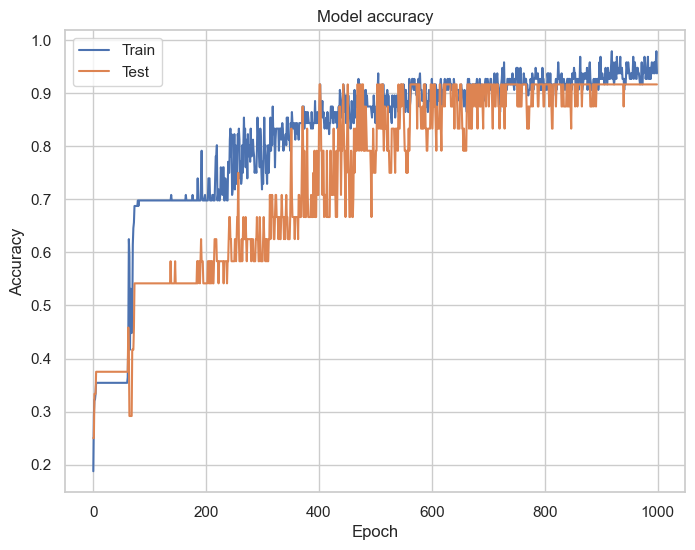

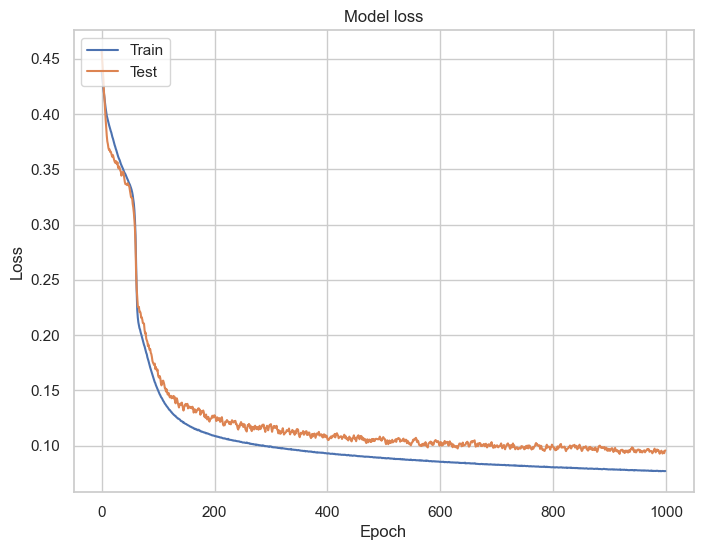

In [9]:
plt.plot(history.history['accuracy']) #we plot the accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss']) #we plot the loss
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Note: it may take several hundreds of epochs to actually reach full convergence. Give it a try if you have the time. I will show an example in the solution.

# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** Re-write from scratch the code for FeedForwardNeuralNetwork and FeedForwardNeuralNetworkWithBackprop. Cheat as much as you need by looking at the code provided, but of course the more you do by yourself, the better your training. Feel free to write a first version with naked methods, without the class, then add the class structure in a second step (incapsulation).

#### BONUS **[ZERO pt]** This exercise should already blur the line between "classification" and "regression". Go all the way and learn to predict the value of one of the four continuous features of the Iris dataset based on the other three.

#### BONUS **[ZERO pt]** A classic example is the XOR problem: write a neural network that maps two binary inputs to one binary output, and learn the 2D [XOR](https://en.wikipedia.org/wiki/Exclusive_or) logical operation. If you draw the four points, you will see they are not linearly separable. However you can write a neural network with one hidden layer of two neurons that solves the problem. Initialize the network with random weights, then execute the backpropagation algorithm by hand on paper until you solve it. This is a great exercise if you're stuck with the implementation of backprop and you cannot figure out what went wrong, as it forces you to get the dimensions right. Using 3 hidden neurons is a bit simpler and should require less iterations.

### Final considerations

- The most important take-home message here is to distinguish between the _model_ and the _learning_. You will find most people use "neural network" to refer to both together, which limits the understanding of either part in isolation and therefore each part's limitations and applicability. Be flexible.
- Spoiler alert: Deep Learning, all the way to ChatGPT, is just neural networks and backpropagation, with some fancy tricks (which either you saw before or will see in the next weeks):
    - Deep networks have many layers
    - Convolution
    - Transformers, a network architecture for time-series memory-aware processing
    - A sophisticated word embedding to enable textual input, check out for example [BERT](https://en.wikipedia.org/wiki/BERT_(language_model))